# PREDICTING	HOUSE	PRICES:	A	REGRESSION	EXAMPLE

In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data(path='boston_housing.npz')

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
test_targets.shape

(102,)

In [6]:
test_targets

array([  7.2,  18.8,  19. ,  27. ,  22.2,  24.5,  31.2,  22.9,  20.5,
        23.2,  18.6,  14.5,  17.8,  50. ,  20.8,  24.3,  24.2,  19.8,
        19.1,  22.7,  12. ,  10.2,  20. ,  18.5,  20.9,  23. ,  27.5,
        30.1,   9.5,  22. ,  21.2,  14.1,  33.1,  23.4,  20.1,   7.4,
        15.4,  23.8,  20.1,  24.5,  33. ,  28.4,  14.1,  46.7,  32.5,
        29.6,  28.4,  19.8,  20.2,  25. ,  35.4,  20.3,   9.7,  14.5,
        34.9,  26.6,   7.2,  50. ,  32.4,  21.6,  29.8,  13.1,  27.5,
        21.2,  23.1,  21.9,  13. ,  23.2,   8.1,   5.6,  21.7,  29.6,
        19.6,   7. ,  26.4,  18.9,  20.9,  28.1,  35.4,  10.2,  24.3,
        43.1,  17.6,  15.4,  16.2,  27.1,  21.4,  21.5,  22.4,  25. ,
        16.6,  18.6,  22. ,  42.8,  35.1,  21.5,  36. ,  21.9,  24.1,
        50. ,  26.7,  25. ])

1. Tỷ lệ tội phạm theo đầu người.
2. Tỷ lệ diện tích đất ở được quy hoạch cho các lô đất trên 25.000 bộ vuông.
3. Tỷ lệ diện tích kinh doanh không bán lẻ trên mỗi thị trấn.
4. Biến giả của sông Charles (= 1 nếu có đường sông, 0 nếu không).
5. Nitric oxide tập trung (phần trên 10 triệu).
6. Số phòng trung bình trên mỗi căn hộ.
7. Tỷ lệ các đơn vị do chủ sở hữu chiếm đóng trước năm 1940.
8. Khoảng cách cân bằng đến năm trung tâm việc làm ở Boston.
9. Chỉ số tiếp cận đường cao tốc xuyên tâm.
10. Giá trị đầy đủ thuế suất thuế tài sản trên 10.000 đô la.
11. Tỷ lệ học sinh-giáo viên theo thị trấn.
12. 1000 * (Bk - 0.63) * * 2 Trong đó Bk là tỷ lệ người da đen theo thành phố .
13. % dân số ở mức thấp.

## Regression example 
Trong 2 ví dụ trước, model chỉ sử dụng để predict 1 discrete label (giá trị rời rạc, chắc chắn, có thể đếm được ). </br>
Một dạng bài toán cũng hay gặp trong Machine learning là Regression, ta sẽ xây dựng model để predict 1 continuous value - giá trị hồi quy, có thể là bất cứ số nào trong khoảng </br>
Một số ví dụ : 
- Nhiệt độ ngày mai
- Dự đoán thời gian hoàn thành công việc 
Lưu ý : **Regression** và **Logistic Regression** là 2 dạng toán **khác nhau**, LR là 1 **giải thuật phân loại**

In [7]:
train_targets

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5,  10.9,  30.8,  32.9,  24. ,  18.5,  13.3,  22.9,
        34.7,  16.6,  17.5,  22.3,  16.1,  14.9,  23.1,  34.9,  25. ,
        13.9,  13.1,  20.4,  20. ,  15.2,  24.7,  22.2,  16.7,  12.7,
        15.6,  18.4,  21. ,  30.1,  15.1,  18.7,   9.6,  31.5,  24.8,
        19.1,  22. ,  14.5,  11. ,  32. ,  29.4,  20.3,  24.4,  14.6,
        19.5,  14.1,  14.3,  15.6,  10.5,   6.3,  19.3,  19.3,  13.4,
        36.4,  17.8,  13.5,  16.5,   8.3,  14.3,  16. ,  13.4,  28.6,
        43.5,  20.2,  22. ,  23. ,  20.7,  12.5,  48.5,  14.6,  13.4,
        23.7,  50. ,  21.7,  39.8,  38.7,  22.2,  34.9,  22.5,  31.1,
        28.7,  46. ,  41.7,  21. ,  26.6,  15. ,  24.4,  13.3,  21.2,
        11.7,  21.7,  19.4,  50. ,  22.8,  19.7,  24.7,  36.2,  14.2,
        18.9,  18.3,  20.6,  24.6,  18.2,   8.7,  44. ,  10.4,  13.2,
        21.2,  37. ,

In [8]:
import numpy as np

print("min : ", np.min(train_targets))
print("max : ", np.max(train_targets))
# Giá nhà nằm trong khoảng (55k -> 50k $ (1970s))

min :  5.0
max :  50.0


## Chuẩn hóa data

Không nên feed network các giá trị có ranges lớn, dù network sẽ học được nhưng quá trình học sẽ khó hơn. Ta sẽ sử dụng **feature-wise normalization** : (xi - mean(X))/std

In [9]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [10]:
print("min : ", np.min(train_data), " max :", np.max(train_data))

min :  -3.81725032019  max : 9.2348471784


## Let's build our network
Vì có ít samples, ta sẽ sử dụng 1 network nhỏ với 2 hidden layers, mỗi layer có 64 hidden units. Trong thực tế, càng ít data, over-fitting càng trầm trọng hơn, và sử dụng 1 network nhỏ là 1 giải pháp 

In [11]:
from keras import models
from keras import layers

In [12]:
def build_model():
    model = models.Sequential()

    model.add(layers.Dense(64, activation='relu', input_shape= ( train_data.shape[1],)))
    # 13 feature -> input shape = 13
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [13]:
build_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Output layers chỉ có 1 hidden unit và không có activation function là cách phổ biến trong bài toán predict 1 giá trị liên tục. Khi sử dụng activation function, **output value sẽ bị hạn chế**. 

VD: Nếu ta sử dụng sigmoid vào layer cuối, output sẽ trong khoảng 0-1. Nhưng nếu không sử dụng,range của output sẽ rộng hơn ( giải thích hơi tù )

**MSE : Mean square error**

$$ MSE = \frac{1}{n}\sum_{t=1}^{n}e_t^2 $$

**MAE : Mean Absolute Error**
$$ MAE = \frac{1}{n}\sum_{t=1}^{n}|e_t| $$ 

## Validate sử dụng K-fold validation

Ta có thể chia data ra thành tập training & validation, tuy vậy validation sẽ rất nhỏ (~ 100 examples) -> giá trị đó sẽ phụ thuộc nhiều vào tập data train_test -> not reliable evaluation

**K-fold cross validation** : chia data thành K phần, train với K-1 phần và evaluate với K phần

In [14]:
k = 4 # chia data thanh 4 phan, train 3 & valid 1
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('Processing fold #',i) # 0,1,2,3
    # chuan bi validation data
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # chuan bi train data 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis= 0) # join sequence of array
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    # build model
    model = build_model()
    # train 
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs, 
              batch_size=1,
              verbose = 0) # silent mode
    # Eval
    val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)
    

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [15]:
all_scores

[2.1486270427703857,
 2.1256098487589621,
 2.9143615784031329,
 2.4292112671502748]

In [16]:
np.mean(all_scores)

2.4044524342706888

--> Predict lệch trung bình 2.4 ( 2.4k ) 
Khá lớn khi giá nhà chỉ nằm trong khoảng 10k -> 50k

### training lâu hơn với 500 epochs
Ta sẽ modify lại quá trình train và log lại validation score mỗi epoch

In [17]:
from keras import backend as K
#mem clean
K.clear_session()

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # chuan bi train data 
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis= 0) # join sequence of array
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data,val_targets),
                        epochs=num_epochs,
                        batch_size=1,
                        verbose = 0) # silent mode
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [19]:
all_mae_histories

[[3.8351508414391242,
  2.7898495362536742,
  2.5964610505812238,
  2.3453178500184917,
  2.4164547873015452,
  2.4254728071760425,
  2.2670316696166992,
  2.2739332312404521,
  2.1704716115894884,
  2.3203948370300895,
  2.1003622772670028,
  2.3076783454064094,
  2.1156866621262957,
  1.9711021952109762,
  1.9375606008095316,
  2.1324811737136087,
  2.049485966710761,
  1.904081656201051,
  2.2488441939401156,
  2.1031468646361096,
  1.884555476726872,
  1.878069542422153,
  1.8327557875378298,
  1.8773881468442406,
  1.9474795879703937,
  1.9495983123779297,
  1.8490122143584904,
  1.8298280262711024,
  1.8534793806548167,
  2.2227355371607413,
  2.0457095580525917,
  2.2838417090991938,
  2.2212377302717456,
  2.1363197364429438,
  2.015830077747307,
  2.0092860826171273,
  2.353700373432424,
  1.8246377954388608,
  1.8263311669377997,
  2.073512374764622,
  1.9706899388001697,
  1.9512503973328241,
  2.0542035527748639,
  1.9655084609985352,
  1.8922958846139435,
  2.1182711195237

In [20]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

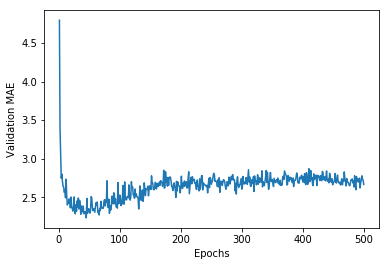

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

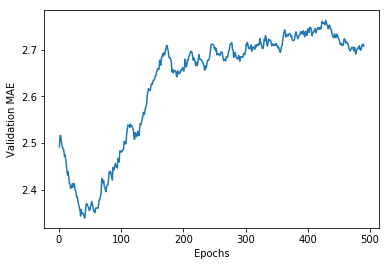

In [22]:
def smooth_curve(points, factor=0.9):
    smooth_points = []
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(previous * factor + point*(1-factor))
        else:
            smooth_points.append(point)
    return smooth_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

có vẻ MAE ngưng cải thiện sau 80 epochs
--> **train final production** với tất cả training data

In [23]:
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 478us/step


In [24]:
test_mae_score

2.6851871714872471

### LUL Kết quả cũng không khả quan lắm 

## Tổng kết :
- Regression dùng **loss function khác** với classification, thường là MSE
- **Accuracy** metric **không thể áp dụng** vào bài toán **regression**, 1 metric phổ biến hay dùng là MAE
- Khi mỗi feature của data có giá trị ở những khoảng khác nhau, ta nên chuẩn hóa **(scale) từng feature** như 1 bước **preprocessing**
- Khi **lượng data nhỏ**, **K-Fold validation** là 1 phương pháp đáng tin cậy để đánh giá độ chính xác của model
- Nên sử dụng 1 **network nhỏ** khi lượng **data ít** để tránh **over-fitting**
